## 2주차 - 분류

### 2.1 MNIST
이번 주는 미국에서 직접 쓴 필기체 숫자로 이루어진 'MNIST' 데이터 셋을 통해서 필기체 숫자를 분류할 것 입니다. MNIST 데이터 셋은 1990년대에 만들어졌지만 머신러닝 및 딥러닝의 학습 용도로 여전히 자주 활용되는 데이터이기 때문에 저희도 이 데이터를 활용하도록 하죠.

아래는 MNIST 데이터 셋의 예시입니다. <span style="color:red">**항상 데이터를 처음 보면 외형적으로 느껴지는 분석**</span>으로 시작하세요. 데이터를 보면 분류하기 쉬운 것들도 있지만 8행 4열의 숫자의 경우 8인지, 0인지 모호합니다. 그리고 8행 8열 숫자 역시 어떤 숫자인지 모호합니다. 이러한 데이터의 외형을 분석하게 되면 이후에 데이터의 전처리를 어떻게 진행해야할 지 감을 잡을 수 있습니다. 하지만, 이번 주차에는 전처리를 진행하지 않도록 하겠습니다.

![](./images/mnist.png)

### 환경설정
모든 주차에서 필요한 라이브러리와 환경을 설정해줍니다. 각각 어떤 것을 의미하는 지는 직접 구글링을 해보세요. 만약, 오류가 나는 경우 오류 메시지를 자세히 보세요. 오류 메시지가 문제를 해결하는 방법을 알려줍니다. 또는 오류 메시지 자체를 구글링하는 방법도 좋은 선택입니다.

예를 들어서 'ModuleNotFoundError'의 경우에는 현재 가상환경에 라이브러리 및 패키지가 설치되어있지 않을 때 발생하는 오류입니다. 이에 대한 오류는 제 블로그에 설명을 해놓았으니 아래의 링크를 참조하세요.

https://everyday-image-processing.tistory.com/73

In [123]:
# 공통
# 만약 경고를 무시하고 싶다면 아래를 주석 해제 하세요.
# import warnings
# warnings.filterwarnings(action='ignore')
import os
import numpy as np

np.random.seed(42)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sn
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
sn.set()

import matplotlib.font_manager as fm

fontprop = fm.FontProperties(fname="./MalgunGothic.ttf", size=24)

# 한글출력
matplotlib.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False
# plt.rcParams["font.family"] = 'NanumGothicCoding'
# plt.rcParams['font.size'] = 12.
# plt.rcParams['xtick.labelsize'] = 24.
# plt.rcParams['ytick.labelsize'] = 24.
# plt.rcParams['axes.labelsize'] = 20.

위의 셀이 정상적으로 실행된다면 이제 실제 MNIST 데이터 셋을 다운로드하도록 하겠습니다. MNIST 데이터 셋은 원래 scikit-learn에서 지원하였지만 버전 상의 문제로 tensorflow에 있는 데이터 셋은 MNIST를 사용하도록 하겠습니다. 어차피 동일하니까 상관없습니다.

In [124]:
from tensorflow.keras.datasets import mnist

(train_x, train_y), (test_x, test_y) = mnist.load_data() # MNIST 데이터를 가져옵니다.

In [3]:
X = np.vstack((train_x, test_x))
X = X.reshape([-1, 28*28])

y = np.append(train_y, test_y)

########### START ###########
# 이 사이에 있는 코드를 완성하세요. 
# 조건 : 행렬 X, y의 shape을 출력하기.
print("X.shape : ", None)
print("y.shape : ", None)
############ END ############

X.shape :  (70000, 784)
y.shape :  (70000,)


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


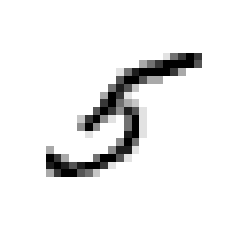

In [4]:
some_digit = X[35]
some_digit_image = some_digit.reshape(-1, 28)
# matplotlib는 어떤 이미지나 데이터를 그리는 라이브러리입니다.
# 활용도가 매우 높은 라이브러리이기 때문에 익숙해지는 것은 필수입니다.
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary,
          interpolation='nearest')
plt.axis('off')
plt.show()

1주차에서 언급한 것처럼 하나의 데이터 셋은 기본적으로 훈련 데이터셋과 시험 데이터셋으로 나누어야합니다. 훈련 데이터셋을 바탕으로 학습을 하고, 시험 데이터셋을 바탕으로 학습 결과를 확인합니다.

In [5]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

########### START ###########
# 조건 : 해당 행렬의 shape을 출력하세요
print("X_train.shape", None)
print("X_test.shape", None)
print("y_train.shape", None)
print("y_test.shape", None)
############ END ############

X_train.shape (60000, 784)
X_test.shape (10000, 784)
y_train.shape (60000,)
y_test.shape (10000,)


### 2.2 이진 분류기 훈련

MNIST 데이터 셋은 0~9사이의 숫자를 가지고 있습니다. 하지만 문제를 단순하게 시작하는 것도 좋은 방법입니다. 따라서 5만 식별하는 분류기부터 구현하도록 하겠습니다. 이 분류기의 목표는 숫자가 5인지 아닌지를 분류하는 이진 분류기(Binary Classifier)를 구현하는 것입니다.

In [23]:
########### START ###########
# 조건 : 넘파이 객체의 특징을 이용해서 5인 레이블은 True, 5가 아닌 레이블은 False로 지정하세요.
y_train_5 = None
y_test_5 = None
############ END ############

In [7]:
np.where(y_train == 5)

(array([    8,    11,    25, ..., 59928, 59942, 59965]),)

본격적으로 scikit-learn의 `SGDClassifier`를 이용해서 이진 분류기를 구현하겠습니다. `SGDClassifier`는 확률적 경사 하강법(Stochastic Gradient Descent; SGD)을 이용한 선형 분류기입니다. 디폴트 값으로  `loss='hinge'`이고 linear SVM을 이용해서 분류기를 학습합니다. 

`SGDClassifier`는 매우 큰 데이터셋을 효율적으로 처리하는 장점이 있습니다.

`hinge loss`의 식은 아래와 같습니다.
$$hinge\ loss = \max\{0, 1 - (y^{'} \cdot y)\}$$

In [8]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, random_state=42)

sgd_clf.fit(X_train, y_train_5)

/home/jhnam0514/anaconda3/envs/MOD777/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


SGDClassifier(max_iter=5, random_state=42)

## Q1. `SGDClassifier`의 인자 중 `max_iter`의 의미는?

In [10]:
sgd_clf.predict([some_digit])

array([False])

## 2.3 성능 측정

### 2.3.1 교차 검증(cross validation)을 사용한 정확도 측정

In [24]:
from sklearn.model_selection import cross_val_score

result = cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

/home/jhnam0514/anaconda3/envs/MOD777/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/jhnam0514/anaconda3/envs/MOD777/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/jhnam0514/anaconda3/envs/MOD777/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [27]:
########### START ###########
# 조건 : 교차검증을 통해 얻은 결과의 평균과 분산을 소수점 네번째 자리까지 계산하세요.
print("mean of cross validation : ", None)
print("std of cross validation : ", None)
############ END ############

mean of cross validation :  0.9597
std of cross validation :  0.0031


## Q2. `cross_val_score`의 인자 중 `cv`의 의미는?

`cross_val_score` 함수를 통해서 각 데이터를 3번으로 나누어 각각에 대한 결과를 정확도로 얻은 것을 볼 수 있다. 일반적으로 이 3번의 결과를 평균으로 계산한다.

`cross_val_score`와 비슷한 기능을 하는 함수로 `StratifiedKFold`가 있다. `StratifiedKFold`는 훈련 데이터셋의 클래스별 비율이 유지되도록 폴드(Fold)를 만들기 위해 <span style="color:red"> **계층적 샘플링** </span>을 수행한다.

출력 결과는 위와 같다.

In [12]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5) :
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_folds = X_train[test_index]
    y_test_folds = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_folds)
    n_correct = sum(y_pred == y_test_folds)
    print(n_correct / len(y_pred))

/home/jhnam0514/anaconda3/envs/MOD777/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/home/jhnam0514/anaconda3/envs/MOD777/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.964


/home/jhnam0514/anaconda3/envs/MOD777/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.9579


/home/jhnam0514/anaconda3/envs/MOD777/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.9571


### Q3. `StratifiedKFold`의 인자 중 `n_splits`의 의미는 무엇이며 `cross_val_score`에서 동일한 기능을 하는 인자는 무엇인가?

모든 이미지에 대해서 `5가 아님`을 분류하는 분류기를 구현할 수 있다.

In [13]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator) :
    def fit(self, X, y=None) :
        pass
    
    def predict(self, X) :
        return np.zeros((len(X), 1), dtype=bool)

In [14]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.909  , 0.90745, 0.9125 ])

In [20]:
########### START ###########
# 조건 : 5인 레이블을 가지는 y_train의 개수와 5가 아닌 레이블을 가지는 y_train의 개수를 출력하세요.
# 힌트 : ndarray 객체의 특성과 np.where을 사용해보세요.
print("#label 5 = ", None)
print("#not label 5 = ", None)
############ END ############

#label 5 =  5421
#not label 5 =  54579


위의 결과를 보면 모든 숫자를 `5가 아님`으로 분류해도 정확도가 90%이상이 되는 것을 알 수 있다. 이유는 전체 데이터 셋 중 10% 정도만 숫자가 5이기 때문이다.

따라서, 정확도(accuracy)를 성능 측정 지표로 사용하는 것은 불균형한 데이터 셋(imbalanced dataset)을 다루는 데 적합하지 않다.

In [22]:
########### START ###########
# 조건 : 위 코드를 활용해서 각 레이블의 개수를 출력하세요.
# 힌트 : ndarray 객체의 특성과 np.where을 사용해보세요.
print("#label 0 = ", None)
print("#label 1 = ", None)
print("#label 2 = ", None)
print("#label 3 = ", None)
print("#label 4 = ", None)
print("#label 5 = ", None)
print("#label 6 = ", None)
print("#label 7 = ", None)
print("#label 8 = ", None)
print("#label 9 = ", None)
############ END ############

#label 0 =  5923
#label 1 =  6742
#label 2 =  5958
#label 3 =  6131
#label 4 =  5842
#label 5 =  5421
#label 6 =  5918
#label 7 =  6265
#label 8 =  5851
#label 9 =  5949


### 2.3.2 오차 행렬(Confusion Matrix)

- TP(True Positive) : 양성이라고 예측했을 때 실제로 양성인 경우 $\rightarrow$ 정답
- TN(True Negative) : 음성이라고 예측했을 때 실제로 음성인 경우 $\rightarrow$ 정답
- FP(False Positive) : 양성이라고 예측했을 때 실제로 음성인 경우 $\rightarrow$ 실패
- FN(False Negative) : 음성이라고 예측했을 때 실제로 양성인 경우 $\rightarrow$ 실패

![](./images/confusion_matrix.png)

`cross_val_predict()`는 K-Fold를 수행하면서 score값이 아닌 예측값을 반환한다.

In [28]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
y_train_pred

/home/jhnam0514/anaconda3/envs/MOD777/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/jhnam0514/anaconda3/envs/MOD777/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/jhnam0514/anaconda3/envs/MOD777/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


array([False, False, False, ..., False, False, False])

## Q4. `cross_val_score`, `StratifiedKFold`, `cross_val_predict`을 설명하세요.

In [29]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[54058,   521],
       [ 1899,  3522]])

만약 완벽하게 예측한 경우 주대각성분을 제외한 나머지 성분은 0이 되어야한다. 예를 들어 자기자신과 오차행렬을 계산하면 대각행렬을 얻을 수 있다.

In [30]:
confusion_matrix(y_train_5, y_train_5)

array([[54579,     0],
       [    0,  5421]])

### 2.3.3 정밀도(Precision)과 재현율(Recall)

#### 정밀도
$$\text{Precision} = \frac{TP}{TP + FP}$$

예를 들어서 자기자신과의 오차행렬의 정밀도를 계산해보자.

In [31]:
self_confusion_matrix = confusion_matrix(y_train_5, y_train_5)

########### START ###########
# 조건 : 위의 식을 이용해서 정밀도를 계산하세요.
print("precision = ", None)
############ END ############

precision =  1.0


이제 예측한 레이블과 실제 레이블 사이의 오차행렬에서의 정밀도를 계산해보자.

In [33]:
cm = confusion_matrix(y_train_5, y_train_pred)

########### START ###########
# 조건 : 위의 식을 이용해서 소수점 4번째자리까지 정밀도를 계산하세요.
print("precision = ", None)
############ END ############

precision =  0.8711


하지만 scikit-learn에서는 예측값과 실제값을 입력하면 precision을 반환하는 함수가 존재한다.

In [36]:
from sklearn.metrics import precision_score

########### START ###########
# 조건 : precision_score를 이용해서 소수점 4번째자리까지 정밀도를 계산하세요.
print("precision = ", None)
############ END ############

precision =  0.8711


#### 재현율
$$\text{Recall} = \frac{TP}{TP + FN}$$

예를 들어서 자기자신과의 오차행렬의 재현율을 계산해보자.

In [202]:
self_confusion_matrix = confusion_matrix(y_train_5, y_train_5)

########### START ###########
# 조건 : 위의 식을 이용해서 재현율를 계산하세요.
print("recall = ", None)
############ END ############

recall =  1.0


이제 예측한 레이블과 실제 레이블 사이의 오차행렬에서의 재현율 계산해보자.

In [37]:
cm = confusion_matrix(y_train_5, y_train_pred)

########### START ###########
# 조건 : 위의 식을 이용해서 소수점 4번째자리까지 재현율를 계산하세요.
print("recall = ", None)
############ END ############

recall =  0.6497


하지만 scikit-learn에서는 예측값과 실제값을 입력하면 recall을 반환하는 함수가 존재한다.

In [38]:
from sklearn.metrics import recall_score

########### START ###########
# 조건 : recall_score 이용해서 소수점 4번째자리까지 정밀도를 계산하세요.
print("recall = ", None)
############ END ############

recall =  0.6497


### F1-score
$$\text{F1 score} = \frac{2}{\frac{1}{\text{Precision}} + \frac{1}{\text{Recall}}} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} = \frac{\text{TP}}{\text{TP} + \frac{\text{FN} + \text{FP}}{2}}$$

예를 들어서 자기자신과의 오차행렬의 f1 score를 계산해보자.

In [39]:
self_confusion_matrix = confusion_matrix(y_train_5, y_train_5)

########### START ###########
# 조건 : 위의 식을 이용해서 f1 score를 계산하세요.
print("f1 score = ", None)
############ END ############

f1 score =  1.0


In [42]:
cm = confusion_matrix(y_train_5, y_train_pred)

########### START ###########
# 조건 : 위의 식을 이용해서 소수점 4번째자리까지 f1 score를 계산하세요.
print("f1 score = ", None)
############ END ############

f1 score =  0.7443


In [41]:
from sklearn.metrics import f1_score

########### START ###########
# 조건 : f1_score 이용해서 소수점 4번째자리까지 f1 score를 계산하세요.
print("f1 score = ", None)
############ END ############

f1 score =  0.7443


## Q5. 정밀도, 재현율, f1 score의 의미를 서술하세요.

교차검증을 통해 `5인 레이블`을 맞추는 정확도는 약 95% 정도로 매우 높은 결과를 얻을 수 있었습니다. 하지만, 이것은 imbalance 데이터를 사용했기 때문에 정확하지 않은 결과이다.(#`5인 레이블` : #`5가 아닌 레이블` = 1 : 9) 

이에 반해 정밀도, 재현율, f1 score를 통해서 계산해본 결과 각각 약 87%, 65%, 74%의 결과를 얻었습니다. 단순히 정확도로만 판단하는 것에 비해서 성능이 그리 좋지 않다라는 것을 알 수 있습니다. 특히, imbalance 데이터의 경우에는 f1 score가 높아야하지만 80%도 채 넘지 못합니다. 따라서, 성능 향상을 위한 다른 방법을 강구해야합니다.

### 2.3.4 정밀도-재현율 Trade-Off

![](./images/tradeoff.png)

In [43]:
y_scores = sgd_clf.decision_function([some_digit])
print(y_scores)

[-9737.07850237]


In [44]:
threshold = 0
y_some_digit_pred = (y_scores < threshold)
print(y_some_digit_pred)

[ True]


In [210]:
threshold = -200000
y_some_digit_pred = (y_scores < threshold)
y_some_digit_pred

array([False])

In [50]:
# 모든 데이터에 대한 결정 점수를 얻는다.
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                            method='decision_function')

/home/jhnam0514/anaconda3/envs/MOD777/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/jhnam0514/anaconda3/envs/MOD777/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/jhnam0514/anaconda3/envs/MOD777/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [51]:
from sklearn.metrics import precision_recall_curve

# 얻은 결정점수를 바탕으로 Precision-Recall 곡선(PR 곡선)을 그릴 수 있다.
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

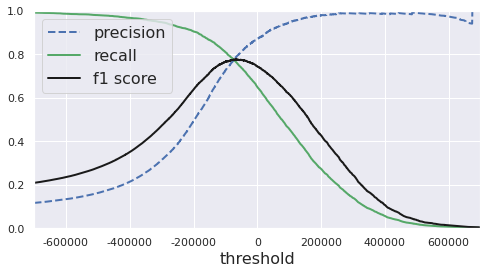

In [64]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="recall", linewidth=2)
    plt.plot(thresholds, 2 * (precisions[:-1] * recalls[:-1])/(precisions[:-1] + recalls[:-1]),
             "k-", label="f1 score", linewidth=2)
    plt.xlabel("threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
plt.show()

f1 score를 그려보면 최대 지점이 나오는 것을 알 수 있다. 이 지점은 정밀도=재현율이 되는 지점임을 알 수 있다. 따라서, 임계값을 수동으로 정한다면 저 지점을 얻으면 될 것이다.

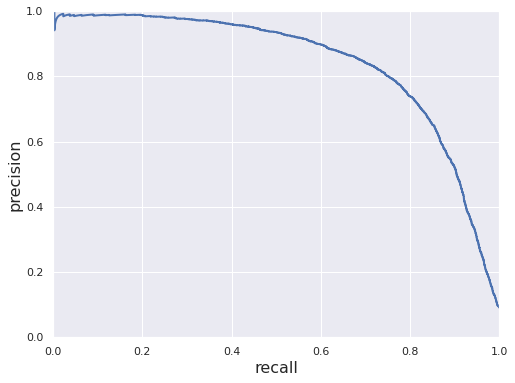

In [60]:
# 일반적으로 x축에 recall, y축에 precision을 정하여 그림을 그린다.
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("recall", fontsize=16)
    plt.ylabel("precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

precision-recall의 trade-off는 위의 그래프에서 하강점 직전, 즉 0.6(60%) 지점을 선택하는 게 좋으나 이는 프로젝트의 성격에 따라서 달라진다.

만약, 정밀도를 90% 이상 달성하는 것이 목표라고 하면 임계값을 조정하여 구할 수 있다.

In [61]:
y_train_pred_90 = (y_scores > 110000)
y_train_pred_90

array([False, False, False, ..., False, False, False])

In [62]:
precision_score(y_train_5, y_train_pred_90)

0.9520383693045563

In [63]:
recall_score(y_train_5, y_train_pred_90)

0.4394023242944106

하지만, 위의 결과 같이 정밀도가 올라가면 재현율은 감소한다. 따라서 정밀도만 높고 재현율이 낮은 분류기는 유용하지 않다고 볼 수 있다.

> 누군가가 '99% 정밀도를 달성하자'라고 하면 반드시 '재현율 얼마에서?'라는 질문을 던져야 한다!

### 2.3.5 ROC 곡선
ROC(Receiver Operating Characteristic; 수신자 조작 특성) 곡선 또한 이진 분류에서 주로 사용된다. ROC 곡선은 **False-Positive Rate(FPR)** 에 대한 **True-Positive Rate(TPR = Recall)** 의 곡선이다.

FPR은 1에서 TNR을 뺀 값과 동일하다. 이때, TNR은 **특이도(Specificity)** 라고도 한다.

$$
\text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}} = \frac{\text{FP} + \text{TN} - \text{TN}}{\text{FP} + \text{TN}} = 1 - \frac{\text{TN}}{\text{FP} + \text{TN}} = 1 - \text{TNR}
$$

따라서 ROC 곡선은 <span style="color:red">**민감도(재현율, Recall)에 대한 1 - 특이도 그래프** </span>이다.

In [65]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

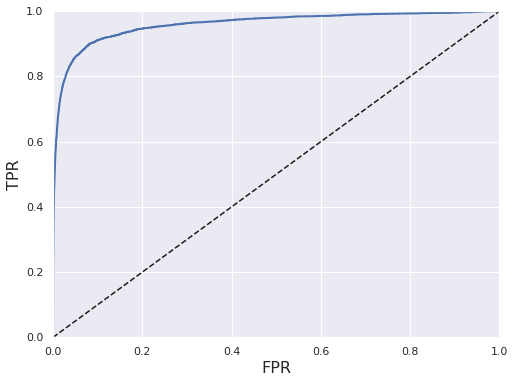

In [73]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('FPR', fontsize=16)
    plt.ylabel('TPR', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

위의 ROC 곡선에서도 trade-off가 있다. 재현율(TPR; Recall)이 높을 수록 FPR이 증가한다. 점선은 클래스를 무작위로 선택하는 분류기의 ROC 곡선을 의미한다. 성능이 좋은 분류기일 수록 점선으로부터 멀리 떨어져야한다.

점선으로부터 떨어져있을 수록 좋은 것은 **AUC(Area Under the Curve)** 라는 것으로 측정한다. 단순히 ROC 곡선 아래의 밑넓이를 의미한다. 따라서 <span style="color:red">**AUC가 1에 가까운 ROC 곡선을 가지는 분류기 일수록 좋은 분류기라고 볼 수 있다.**</span>

In [69]:
from sklearn.metrics import roc_auc_score

########### START ###########
# 조건 : roc_auc_score 이용해서 소수점 4번째자리까지 roc_auc_score를 계산하세요.
print("AUC of ROC curve : ", None)
############ END ############

AUC of ROC curve :  0.9598


아래의 코드는 SGDClassifier와 RandomForestClassifier의 ROC 곡선과 AUC를 비교하는 코드이다. RFClassifier는 이후에 자세히 배울테니 이번 장에서는 쓰는 방법만 알면 된다.

In [70]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state = 42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [71]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

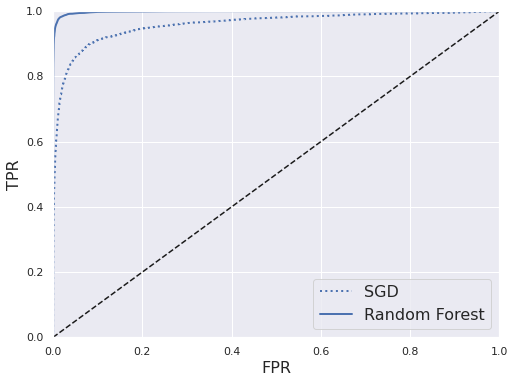

In [81]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
plt.savefig("example.png")
plt.show()

In [83]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)

In [86]:
########### START ###########
# 조건 : scikit-learn의 함수를 이용해서 소수점 4번째자리까지 RandomForestClassifier의 정밀도, 재현율, F1 score, AUC를 계산하세요.
print("Precision of RandomForestClassifier : ", None)
print("Recall of RandomForestClassifier : ", None)
print("F1 score of RandomForestClassifier : ", None)
print("AUC of RandomForestClassifier : ", None)
############ END ############

Precision of RandomForestClassifier :  0.9891
Recall of RandomForestClassifier :  0.8696
F1 score of RandomForestClassifier :  0.9255
AUC of RandomForestClassifier :  0.9984


## Q6. 위의 결과를 이용해서 `RandomForestClassifier`가 `SGDClassifier`보다 더 분류기임을 설명할 수 있는가? 그 이유는 무엇인가?

### 2.4 다중 분류

다중 분류(multiclass/multinomial classification)은 말그대로 2개 이상의 클래스로 분류하는 것을 말한다.

Random Forest, Naive Bayes와 같은 알고리즘들은 알고리즘에서 직접 다중 분류가 가능하지만 SVM, Logistic Regression과 같은 알고리즘은 이진 분류만 가능하기 때문에 트릭을 사용한다. 

#### OvA(One versus All, One versus the Rest; OvR)

OvA기법은 MNIST 데이터에서 특정 숫자 하나만 분류하는 이진 분류기를 10개 만들어서 그 중 가장 높은 확률(점수)값을 가지는 클래스로 분류해주는 방법이다.

#### OvO(One versus One)

OvO기법은 0과 1, 0과 2, 1과 2 구별 등과 같이 각 클래스에 조합에 따른 모든 분류기를 생성하여 학습하는 방법이다. 이 방법은 클래스의 개수가 N개라고 가정했을 때 $\frac{N \times (N - 1)}{2}$개의 분류기가 필요하다.

따라서 MNIST 데이터의 경우에는 10개의 클래스가 있으므로 총 45개의 분류기를 만들어 가장 많이 양성 클래스로 분류된 클래스를 선택해야한다.

SVM과 같은 알고리즘은 훈련 데이터의 크기에 민감하기 때문에 작은 훈련 데이터에서 여러 개의 분류기를 학습하는 것이 빠르기 때문에 OvO를 사용하지만, 대부분의 이진 분류 알고리즘은 OvA를 사용한다.

Scikit-learn에서는 이진 분류 알고리즘을 이용해서 다중 분류를 수행할 경우 자동으로 OvA(SVM이라면 OvO)를 이용해서 학습하게 된다.

In [87]:
sgd_clf.fit(X_train, y_train)

/home/jhnam0514/anaconda3/envs/MOD777/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


SGDClassifier(max_iter=5, random_state=42)

In [88]:
sgd_clf.predict([some_digit])

array([5], dtype=uint8)

In [89]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-316862.83301713, -126087.57115116, -323328.01533723,
        -172686.08830523, -151770.51458938,  125765.87830601,
        -532184.20022905, -505026.02263703,  -68942.92775798,
        -426178.30837231]])

In [90]:
np.argmax(some_digit_scores)

5

Scikit-learn에서 OvO, OvA를 사용하도록 `OneVsOneClassifier`나 `OneVsRestClassifier`를 이용해서 지정할 수 있다.

In [91]:
from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, random_state=42))
ovo_clf.fit(X_train, y_train)

/home/jhnam0514/anaconda3/envs/MOD777/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/jhnam0514/anaconda3/envs/MOD777/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/jhnam0514/anaconda3/envs/MOD777/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/jhnam0514/anaconda3/envs/MOD777/lib/python3.8/site-packages/sklearn/linear_model/_sto

OneVsOneClassifier(estimator=SGDClassifier(max_iter=5, random_state=42))

In [92]:
ovo_clf.predict([some_digit])

array([5], dtype=uint8)

In [93]:
len(ovo_clf.estimators_) # OvO 기법을 사용했기 때문에 총 45개의 분류기가 생성된다.

45

Random Forest 알고리즘은 알고리즘 자체에서 다중 클래스 분류를 지원하기 때문에 OvA, OvO 같은 방법을 필요로 하지않다.

In [94]:
forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [95]:
forest_clf.predict([some_digit])

array([5], dtype=uint8)

In [98]:
########### START ###########
# 조건 : X_train, y_train을 사용해서 5개의 fold에 대한 정확도의 평균과 표준편차를 소수점 4번째자리까지 계산하세요.
# 힌트 : cross_val_score
results = None
print("mean = ", None)
print("std = ", None)
############ END ############

/home/jhnam0514/anaconda3/envs/MOD777/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/jhnam0514/anaconda3/envs/MOD777/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/jhnam0514/anaconda3/envs/MOD777/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/jhnam0514/anaconda3/envs/MOD777/lib/python3.8/site-packages/sklearn/linear_model/_sto

mean =  0.8664
std =  0.0072


/home/jhnam0514/anaconda3/envs/MOD777/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


#### 번외

scikit-learn에서 제공하는 StandardScaler를 사용해서 데이터의 스케일(픽셀 강도)를 조정할 수 있다.

In [100]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

Text(0.5, 1.0, 'scaled digit')

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


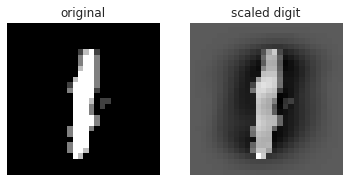

In [101]:
random_idx = np.random.choice(np.arange(0, len(X_train_scaled)))
fig, ax = plt.subplots(1, 2)
ax[0].imshow(X_train[random_idx].reshape(28, 28), cmap='gray')
ax[0].axis('off')
ax[0].set_title('original')
ax[1].imshow(X_train_scaled[random_idx].reshape(28, 28), cmap='gray')
ax[1].axis('off')
ax[1].set_title('scaled digit')

In [102]:
########### START ###########
# 조건 : 스케일링된 X_train, y_train을 사용해서 5개의 fold에 대한 정확도의 평균과 표준편차를 소수점 4번째자리까지 계산하세요.
# 힌트 : cross_val_score
results = None
print("mean = ", None)
print("std = ", None)
############ END ############

/home/jhnam0514/anaconda3/envs/MOD777/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/jhnam0514/anaconda3/envs/MOD777/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/jhnam0514/anaconda3/envs/MOD777/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/jhnam0514/anaconda3/envs/MOD777/lib/python3.8/site-packages/sklearn/linear_model/_sto

mean =  0.9108
std =  0.0026


/home/jhnam0514/anaconda3/envs/MOD777/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


단순한 스케일링 작업만으로도 성능이 5%정도 향상이 되었습니다. 하지만 중요한 것인 이러한 작업이 **모든 데이터에는 적용되지 않을 수도 있다는 사실입니다.**

### 3.5 에러 분석

항상 모델의 성능을 향상시키기 위해서는 반드시 오류에 대한 분석을 해야합니다. 고등학교 때 입시 시절을 생각해보세요. 여러분들이 문제를 풀 때 그냥 한번 채점하고 끝내지 않으니까! 여기서도 동일하게 생각하면 됩니다. 성적을 향상시키기 위해서 오답 분석을 하는 거죠!

모델도 동일하게 오답 분석을 통해서 성능을 향상시키는 작업을 할 수 있습니다. 대표적으로 **오차 행렬(confusion matrix)** 을 이용할 수 있습니다. sklearn에 구현된 함수를 사용해보세요. 

In [103]:
# 방금 스케일링된 X_train을 사용해서 각 X_train_scaled에 대한 predict 값을 얻는다.
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
print(conf_mx)

/home/jhnam0514/anaconda3/envs/MOD777/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/jhnam0514/anaconda3/envs/MOD777/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/jhnam0514/anaconda3/envs/MOD777/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


[[5722    2   28    9    8   49   51   11   41    2]
 [   2 6494   47   23    6   42    5   10  100   13]
 [  51   37 5360   88   82   23   96   56  149   16]
 [  51   37  149 5318    2  248   37   57  134   98]
 [  19   25   39    8 5378    7   54   29   77  206]
 [  73   42   35  170   73 4622  105   30  177   94]
 [  31   24   43    2   43   88 5635    4   47    1]
 [  20   20   65   27   58   11    6 5806   12  240]
 [  53  147   78  164   11  163   56   24 5017  138]
 [  42   27   25   87  175   34    3  201   85 5270]]


<AxesSubplot:>

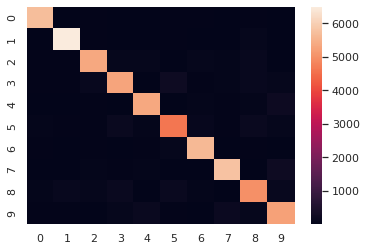

In [104]:
sn.heatmap(conf_mx)

맞는 것도 중요하지만 틀린 것을 분석하는 것이 중요합니다. 하지만, 현재 주대각성분의 값이 너무 강조되어 있어 어떤 값이 틀렸는 지 분석하기 어렵습니다. 이를 해결하는 방법은 주대각선성분의 값을 0으로 채워버립니다.

In [106]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

값을 0~1사이로 정규화하는 작업입니다. 너무 큰 값으로 비교하다면 가끔씩 착각을 할 수도 있습니다.

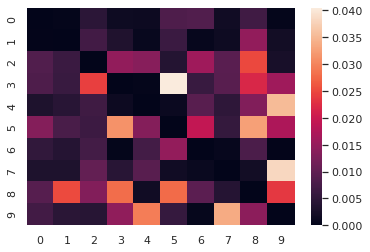

In [107]:
########### START ###########
# 조건 : norm_conf_mx의 주대각성분의 값을 0으로 채우고 heatmap으로 그리세요
# 힌트 : 넘파이의 함수 사용와 seaborn의 heatmap 함수 사용
None
None
############ END ############

여기서 알수 있는 사실은 실제로는 3이지만 5로 분류하는 경우, 그리고 실제로는 8이지만 9로 분류하는 경우가 상대적으로 많다는 점입니다. 이 문제를 해결하는 방법은 3, 5, 8, 9의 데이터를 더 추가하거나 분류기에 도움이 될만한 특성을 추가적으로 추출하는 방법입니다.

In [108]:
# 숫자 그림을 위한 추가 함수
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

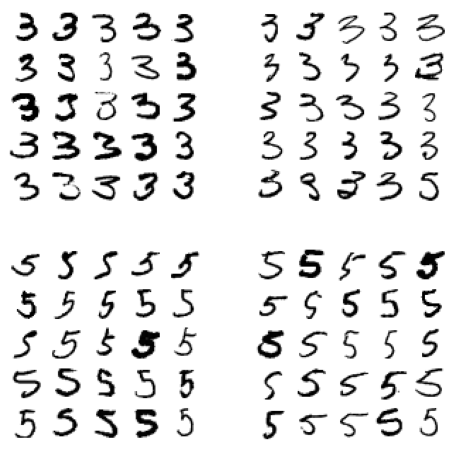

In [109]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

### 2.6 다중 레이블 분류

지금까지 살펴본 내용은 하나의 클래스에만 분류되는 경우였다. 하지만, 데이터에 따라서 여러개의 클래스에 분류해야하는 경우도 있습니다. 이러한 분류를 다중 레이블 분류(multilabel classification)이라고 한다.

아래의 예제는 `kNN`알고리즘을 이용한 `KNeighborClassifier` 분류기를 사용해서 첫번째 클래스는 7보다 크다나 같은지(`>=7`), 두번째 클래스는 홀수(`odd`)인지를 분류하는 다중 레이블 분류 예제이다.

In [110]:
from sklearn.neighbors import KNeighborsClassifier

########### START ###########
# 조건 : numpy 객체의 특징을 이용해서 y_train 중 7보다 크거나 같은 값은 True, 작은 값은 False로 지정하세요.
y_train_large = None
############ END ############

########### START ###########
# 조건 : numpy 객체의 특징을 이용해서 y_train 중 홀수는 True, 짝수는 False로 지정하세요.
y_train_odd = None
############ END ############

y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [111]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [113]:
# 매우 오래걸리니 돌리는 건 비추천합니다.
# %%time
# y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3, n_jobs=-1)
# print(f1_score(y_multilabel, y_train_knn_pred, average="macro"))

### 2.7 다중 출력 분류

In [114]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [119]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")
    plt.savefig('example.png', dpi=300)

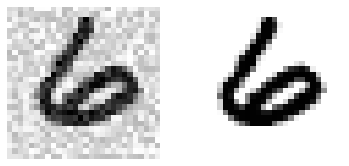

In [118]:
some_index = 5501
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
plt.savefig('example.png', dpi=300)
plt.show()

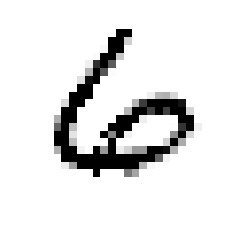

In [120]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)